In [2]:
import pandas as pd
from datetime import date,timedelta

In [3]:
url="http://opendata.ecdc.europa.eu/covid19/casedistribution/csv/"
df2=pd.read_csv(url, parse_dates=["dateRep"], dayfirst=True)

In [4]:
df=df2[(df2.dateRep<pd.Timestamp(date.today()- timedelta(days = 1))) & (df2.dateRep>pd.Timestamp('2020-02-15'))].sort_values(by=["dateRep"], ascending=True)

In [5]:
eu=["Austria","Italy","Belgium","Latvia","Bulgaria","Lithuania","Croatia","Luxembourg","Cyprus","Malta",
             "Czechia","Netherlands","Denmark","Poland","Estonia","Portugal","Finland","Romania","France",
             "Slovakia","Germany","Slovenia","Greece","Spain","Hungary","Sweden"]

eudf=df[df.countriesAndTerritories.isin(eu)].copy()

eu_dateRep=eudf.groupby("dateRep").dateRep.nth(1) 
eu_cases=eudf.groupby("dateRep").cases.agg('sum')
eu_deaths=eudf.groupby("dateRep").deaths.agg('sum')
eu_pop=eudf.groupby("dateRep").popData2018.agg('sum')
#total_eu_cases=eu_cases.cumsum()
#total_eu_deaths=eu_deaths.cumsum()
#"total_cases":total_eu_cases, "total_deaths":total_eu_deaths,
eudf2=pd.DataFrame({"countriesAndTerritories":"EU (taken as a whole)","cases":eu_cases, "deaths":eu_deaths ,"popData2018":eu_pop}).reset_index()
#dayWith100thcase=eudf2[eudf2.index==eudf2[eudf2['total_cases'].gt(100)].index[0]].dateRep
#eudf2["days_since_100thcase"]=eudf2.apply(lambda r: (r["dateRep"]-dayWith100thcase), axis=1)
df=df.append(eudf2, ignore_index = True, sort = True)

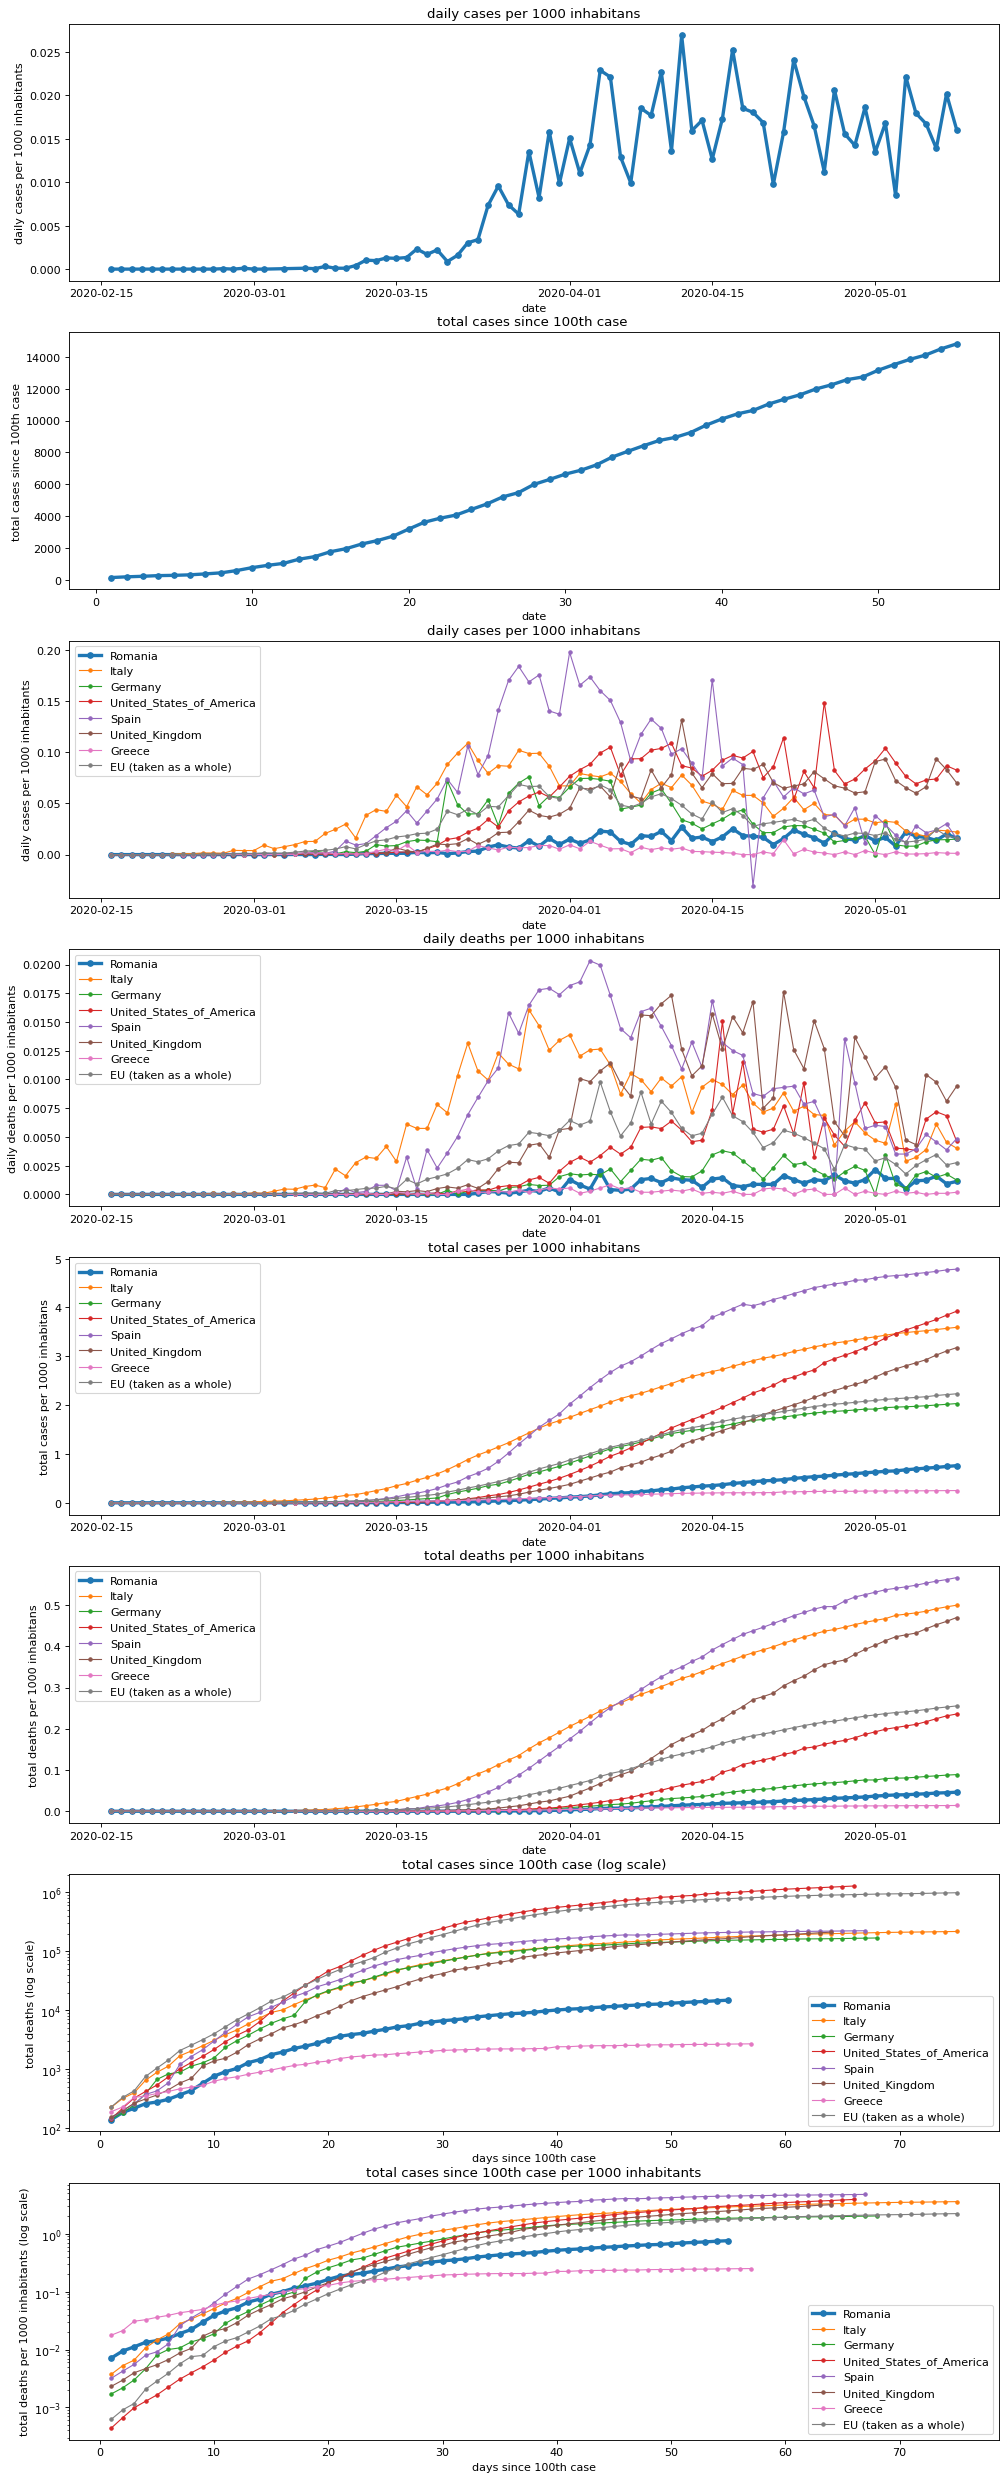

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax= plt.subplots(8, figsize=(15, 40), dpi=80, facecolor='w', edgecolor='k')

c=df[df.countriesAndTerritories=="Romania"].copy()
c["total_cases"]=c.cases.cumsum()
c["total_deaths"]=c.deaths.cumsum()

dayWith100thcase=c[c.index==c[c['total_cases'].gt(100)].index[0]].dateRep
c["days_since_100thcase"]=c.apply(lambda r: (r["dateRep"]-dayWith100thcase), axis=1)
c2=c[c.days_since_100thcase > timedelta(0)].copy()

c2["days_since_100thcase_int"]=c2.days_since_100thcase.astype('timedelta64[D]').astype(int)


linewidth=3
markersize=10

ax[0].plot(c.dateRep, c.cases/c.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)
ax[1].plot(c2.days_since_100thcase_int, c2.total_cases, linewidth=linewidth, marker=".", markersize=markersize)
    

countries= ["Romania","Italy","Germany","United_States_of_America","Spain","United_Kingdom","Greece", "EU (taken as a whole)"]

for country in countries:
    c=df[df.countriesAndTerritories==country].copy()
    c["total_cases"]=c.cases.cumsum()
    c["total_deaths"]=c.deaths.cumsum()
    
    dayWith100thcase=c[c.index==c[c['total_cases'].gt(100)].index[0]].dateRep
    c["days_since_100thcase"]=c.apply(lambda r: (r["dateRep"]-dayWith100thcase), axis=1)
    c2=c[c.days_since_100thcase > timedelta(0)].copy()
    
    c2["days_since_100thcase_int"]=c2.days_since_100thcase.astype('timedelta64[D]').astype(int)
    
    linewidth=1
    markersize=6
    if country=="Romania":
        linewidth=3
        markersize=10
    
    ax[2].plot(c.dateRep, c.cases/c.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)
    ax[3].plot(c.dateRep, c.deaths/c.popData2018*1000, linewidth=linewidth, marker=".",  markersize=markersize)
    ax[4].plot(c.dateRep, c.total_cases/c.popData2018*1000, linewidth=linewidth, marker=".",   markersize=markersize)
    ax[5].plot(c.dateRep, c.total_deaths/c.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)
    ax[6].plot(c2.days_since_100thcase_int, c2.total_cases, linewidth=linewidth, marker=".", markersize=markersize)
    ax[7].plot(c2.days_since_100thcase_int, c2.total_cases/c2.popData2018*1000, linewidth=linewidth, marker=".", markersize=markersize)



 #   ax[2].plot(c.dateRep, c.total_cases)
 #   ax[3].plot(c.dateRep, c.total_deaths)
#plot europe data


ax[0].set_title("daily cases per 1000 inhabitans")
ax[0].set_xlabel("date")
ax[0].set_ylabel("daily cases per 1000 inhabitants")

ax[1].set_title("total cases since 100th case ")
ax[1].set_xlabel("date")
ax[1].set_ylabel("total cases since 100th case")


ax[2].set_title("daily cases per 1000 inhabitans")
ax[2].set_xlabel("date")
ax[2].set_ylabel("daily cases per 1000 inhabitants")

ax[3].set_title("daily deaths per 1000 inhabitans")
ax[3].set_xlabel("date")
ax[3].set_ylabel("daily deaths per 1000 inhabitants")


ax[4].set_title("total cases per 1000 inhabitans")
ax[4].set_xlabel("date")
ax[4].set_ylabel("total cases per 1000 inhabitans")


ax[5].set_title("total deaths per 1000 inhabitans")
ax[5].set_xlabel("date")
ax[5].set_ylabel("total deaths per 1000 inhabitans")


ax[6].set_title("total cases since 100th case (log scale)")
ax[6].set_xlabel("days since 100th case")
ax[6].set_ylabel("total deaths (log scale)")
ax[6].set_yscale("log")

ax[7].set_title("total cases since 100th case per 1000 inhabitants")
ax[7].set_xlabel("days since 100th case")
ax[7].set_ylabel("total deaths per 1000 inhabitants (log scale)")
ax[7].set_yscale("log")

#ax[2].set_yscale("log")
#ax[3].set_yscale("log")


for i in range(2,8):
    ax[i].legend(countries)

fig.savefig("static/romania_stats.png")